In [2]:
import numpy as np
import pandas as pd

## Loading Dataset

In [6]:
# loading the data
df = pd.read_csv('../kofio_dataset/kofio_dataset.csv',sep='\t')

In [86]:
df.head(2)

,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin,Rating,Recommended,Price
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96,14.99
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda,4.4,100,11.99


In [4]:
print(df.count())
# count the number of non-empty values for each column
print("\nItems without NULL value:",df.dropna().count()[0])
# count the number of rows that have no empty values

Item Name          322
Roastery           322
Roast Level        283
Region             309
Flavour Profile    320
Roast Type         283
Process            301
Variety            241
Brewing Method     283
Coffee Origin      320
Rating             111
Recommended        111
Price              179
dtype: int64

Items without NULL value: 53


In [16]:
selected_columns = [['Rating', 'Recommended', 'Price'], ['Roast Level', 'Brewing Method', 'Flavour Profile']]
print(df[selected_columns[0]].count()[0])
# count the number of rows that have non-empty values in selected columns 
print(df[selected_columns[1]].count()[0])
print(df[selected_columns[0] + selected_columns[1]].count()[0])

111
283
111


## Data Cleaning

In [8]:
# Change the type of Price/Recommended to float/int
df['Price'] = df['Price'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
df['Recommended'] = df['Recommended'].apply(lambda x: int(x.replace('%', ''))if isinstance(x, str) else x)
df['Roast Type'] = df['Roast Type'].replace('Omni (recommended for both Filter & Espresso Coffee)', 'Omni')


In [9]:
# Data with prices, ratings and recommended
df_fig2 = df.copy()
df_fig2.dropna(subset=['Price','Rating','Recommended'], inplace=True)
df_fig2.info()
df_fig2.loc[:,['Item Name', 'Roastery', 'Price', 'Rating', 'Recommended']].head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 214
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item Name        72 non-null     object 
 1   Roastery         72 non-null     object 
 2   Roast Level      64 non-null     object 
 3   Region           70 non-null     object 
 4   Flavour Profile  72 non-null     object 
 5   Roast Type       64 non-null     object 
 6   Process          62 non-null     object 
 7   Variety          66 non-null     object 
 8   Brewing Method   64 non-null     object 
 9   Coffee Origin    72 non-null     object 
 10  Rating           72 non-null     float64
 11  Recommended      72 non-null     float64
 12  Price            72 non-null     float64
dtypes: float64(3), object(10)
memory usage: 7.9+ KB


,Item Name,Roastery,Price,Rating,Recommended
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,14.99,4.5,96.0
1,Rwanda KIRAMBO,The naughty dog,11.99,4.4,100.0
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,54.99,4.5,96.0
5,Ethiopia MALAWO - black honey,The naughty dog,12.99,5.0,100.0
6,Kenya NGANDU,The naughty dog,11.99,5.0,100.0


In [10]:
df_fig3 = df.loc[:,['Item Name', 'Roastery', 'Roast Level',	'Region', 'Flavour Profile', 'Roast Type', 'Process', 'Variety', 'Brewing Method', 'Coffee Origin']].copy()
df_fig3 = df_fig3.dropna()
df_fig3.info()
df_fig3.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 321
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Item Name        201 non-null    object
 1   Roastery         201 non-null    object
 2   Roast Level      201 non-null    object
 3   Region           201 non-null    object
 4   Flavour Profile  201 non-null    object
 5   Roast Type       201 non-null    object
 6   Process          201 non-null    object
 7   Variety          201 non-null    object
 8   Brewing Method   201 non-null    object
 9   Coffee Origin    201 non-null    object
dtypes: object(10)
memory usage: 17.3+ KB


,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda
2,Ethiopia SUKE QUTO - washed 1000g,The naughty dog,Light to Medium Light,Guji,"Bergamot,Peach ice tea,Black tea,Flowers",Filter,Washed,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia
4,Ethiopia GORAA,The naughty dog,Light to Medium Light,Guji,"Peach tea,Květinový med,Milk chocolate",Filter,Natural,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia


## Save the cleaned data

In [11]:
df_fig2.to_csv('../kofio_dataset/price_rating_rec_clean.csv',index=False)
df_fig3.to_csv('../kofio_dataset/cluster_clean.csv',index=False)

### For Figure 2

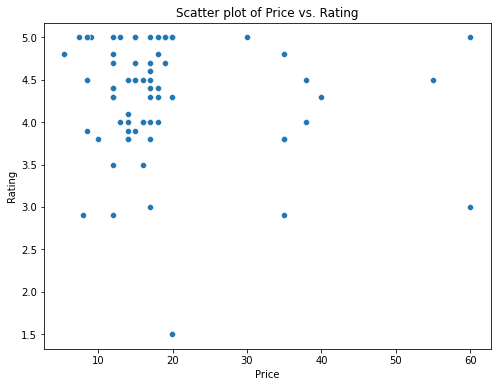

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=df_fig2)
plt.title('Scatter plot of Price vs. Rating')
plt.show()

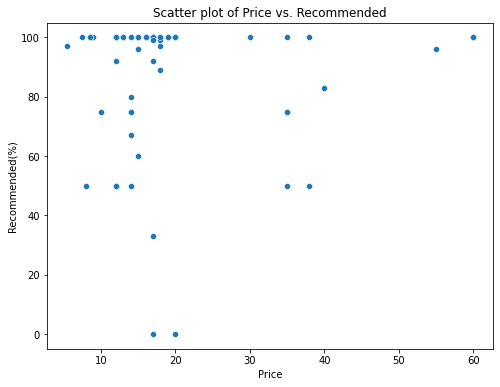

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Recommended', data=df_fig2)
plt.title('Scatter plot of Price vs. Recommended')
plt.ylabel('Recommended(%)')
plt.show()

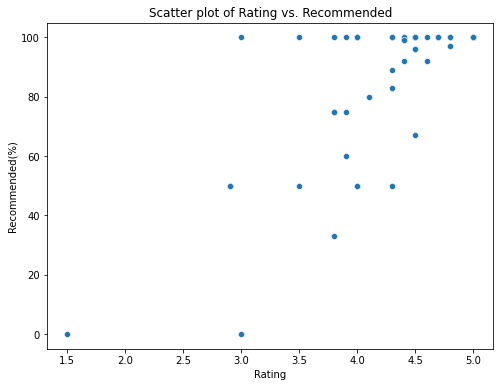

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Recommended', data=df_fig2)
plt.title('Scatter plot of Rating vs. Recommended')
plt.ylabel('Recommended(%)')
plt.show()

Roastery
Doubleshot                   5.000000
Main Lane Coffee Roasters    5.000000
Dark Woods Coffee            4.800000
Industra Coffee              4.750000
Coffea Circulor              4.666667
DAK Coffee Roasters          4.666667
The naughty dog              4.640000
BeBerry Coffee               4.600000
Candycane Coffee             4.550000
Fiftybeans                   4.550000
Gardelli Coffee              4.540000
The Barn                     4.500000
Concept Coffee Roasters      4.400000
Morgon Coffee Roasters       4.400000
Dos Mundos                   4.225000
HAYB Speciality Coffee       4.020000
Nordbeans                    4.000000
Good Beans                   3.933333
Beansmith.s                  3.800000
Father's Coffee Roastery     3.712500
Square Mile                  3.166667
Name: Rating, dtype: float64


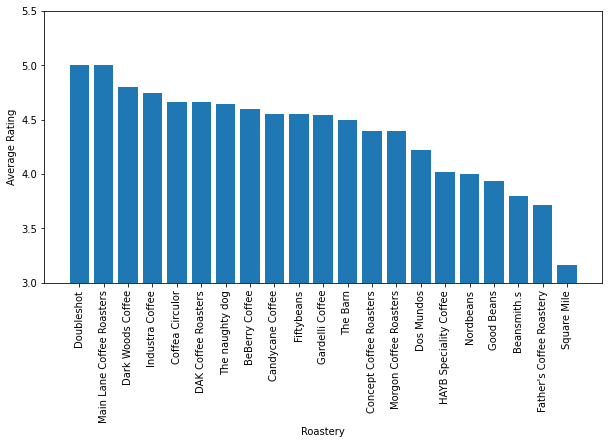

In [85]:
df_mean = df_fig2.groupby('Roastery')['Rating'].mean().sort_values(ascending=False)
print(df_mean)

plt.figure(figsize=(10, 5))
plt.bar(df_mean.index, df_mean.values)

plt.xlabel('Roastery')
plt.ylabel('Average Rating')
plt.ylim([3,5.5])
plt.xticks(rotation=90)

plt.show()

### For Figure 3

In [13]:
# Count the Flavour number
flavour_lists=df_fig3['Flavour Profile'].str.split(',').tolist()
flavours = list(set([flavour for flavour_list in flavour_lists for flavour in flavour_list]))
print(f'There\'re {len(flavours)} flavours')
flavours

There're 194 flavours


['Prosecco',
 'Květinový med',
 'Lime',
 'Peach',
 'Cherry jam',
 'Sedmikráska',
 'Walnuts',
 'Lilac',
 'Red fruits',
 'Cinnamon',
 'Chewing gums',
 'Watermelon',
 'Grapes',
 'Citrus',
 'Raisins',
 'Stone fruit',
 'Apple blossom',
 'Lemon peel',
 'Peach ice tea',
 'Crème brûlée',
 'Kakaové lupínky',
 'Hazelnuts',
 'Yellow plums',
 'Passionflower',
 'Coke',
 'Lískooříškový krém',
 'Pineapple',
 'Dried fruit',
 'Pecans',
 'Cashew',
 'Cheesecake',
 'Pomegranate',
 'Caramel',
 'Plum jam',
 'Marzipan',
 'Blackberry',
 'Růžové pomelo',
 'Orange flower',
 'Jasmine',
 'Jahodové lízátko',
 'Green apple',
 'Lemonade',
 'White peach',
 'Elderberries',
 'Red apple',
 'Orange jam',
 'Chocolate cake',
 'Dark chocolate',
 'Flower honey',
 'Kumquat',
 'Prunes',
 'Carambola',
 'Lemon tea',
 'Vanilla',
 'Moruška',
 'Black currant',
 'Syrup',
 'Strawberries',
 'Oolong',
 'Hibiscus',
 'Figs',
 'Malt',
 'Black tea',
 'Mulberry',
 'Peanut butter',
 'Dark Bitter chocolate',
 'Green tea',
 'Pomelo',
 'Christm

In [12]:
brewing_lists=df_fig3['Brewing Method'].str.split(',').tolist()
methods = list(set([brewing for brewing_list in brewing_lists for brewing in brewing_list]))
print(f'There\'re {len(methods)} brewing methods')
methods

There're 8 brewing methods


['Aeropress',
 'Espresso',
 'French Press',
 'Moka pot',
 'Chemex',
 'Vacuum Pot',
 'Clever dripper',
 'Hario V60']

In [16]:
level_lists=df_fig3['Roast Level'].str.split(',').tolist()
levels = list(set([level for level_list in level_lists for level in level_list]))
print(f'There\'re {len(levels)} Roast Levels')
levels

There're 3 Roast Levels


['Omni', 'Medium to medium dark', 'Light to Medium Light']

In [15]:
type_lists=df_fig3['Roast Type'].str.split(',').tolist()
types = list(set([type_ for type_list in type_lists for type_ in type_list]))
print(f'There\'re {len(types)} Roast Types')
types

There're 3 Roast Types


['Omni', 'Filter', 'Espresso']